In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


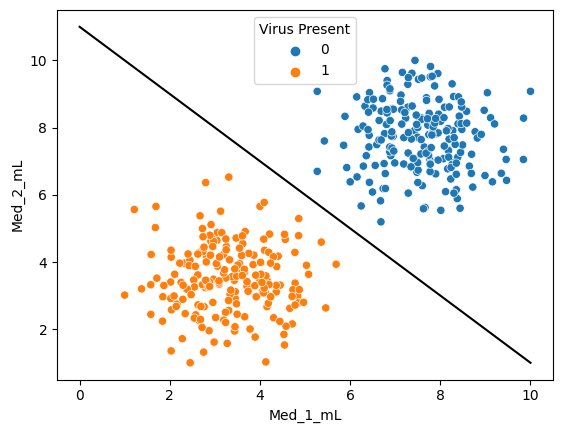

In [10]:
sns.scatterplot(x = 'Med_1_mL' , y = 'Med_2_mL' , data = df , hue = 'Virus Present')

#creating a HYPERPLANE (i.e. 2D Line)
b=11
m = -1
x = np.linspace(0,10,100)
y = m*x +b
plt.plot(x,y, color = 'black')

# SVC (Support Vector Classifier)

In [11]:
from sklearn.svm import SVC

In [13]:
#help(SVC)
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} , 'rbf - radial basis function' is the best kernel.

In [14]:
X = df.drop('Virus Present' , axis = 1)
y = df['Virus Present']

In [15]:
model = SVC(kernel='linear'  , C = 1000) # here C is the inversely proportional of C we discussed in theory classes.

In [16]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [17]:
from svm_margin_plot import plot_svm_boundary

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


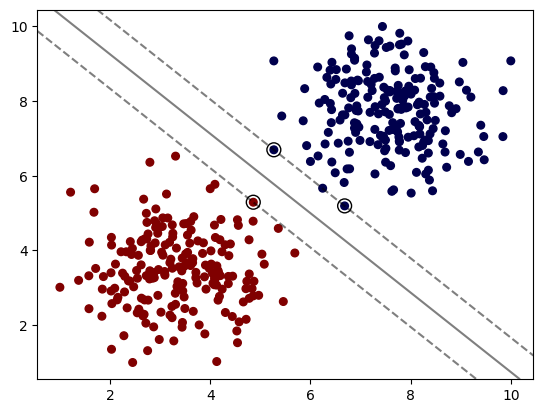

In [18]:
plot_svm_boundary(model , X , y)

## testing on different values of C

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


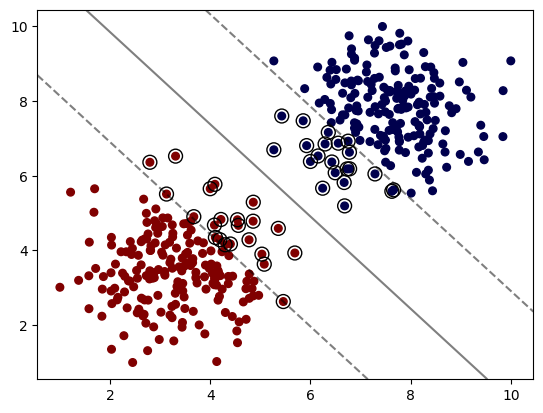

In [24]:
model = SVC(kernel = 'linear' , C = 0.01)
model.fit(X,y)
plot_svm_boundary(model,X,y)

We can see that this C is the inversely proportional of C we discussed in theory classes.

So as we decrease this C , it means we allow more misclassification.

## Testing different kernels 

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


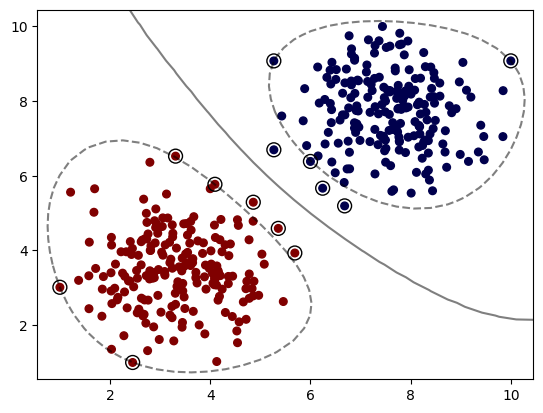

In [31]:
model = SVC(kernel = 'rbf' , C = 1)
model.fit(X,y)
plot_svm_boundary(model , X ,y)

## hyperparameter 'gamma' in 'rbf'

###  if 'scale' uses then ,gamma = 1 / (n_features * X.var())
###   if 'auto', uses then, gamma = 1 / n_features

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


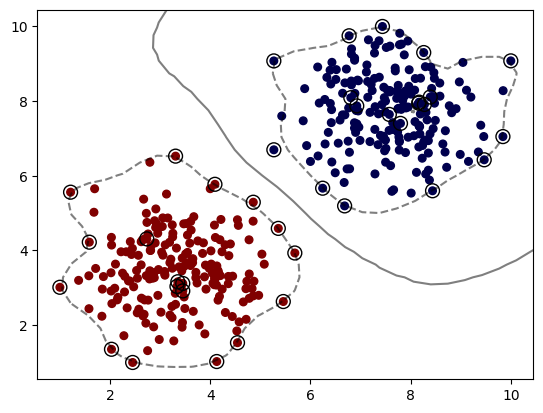

In [34]:
model = SVC(kernel = 'rbf' , gamma ='auto' ,C = 1) # by default gamma = 'sccale'
# As we increase the value of gamma then our model will moves towards overfittiing
model.fit(X,y)
plot_svm_boundary(model , X ,y)

### As we increase the value of gamma then our model will moves towards overfittiing

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


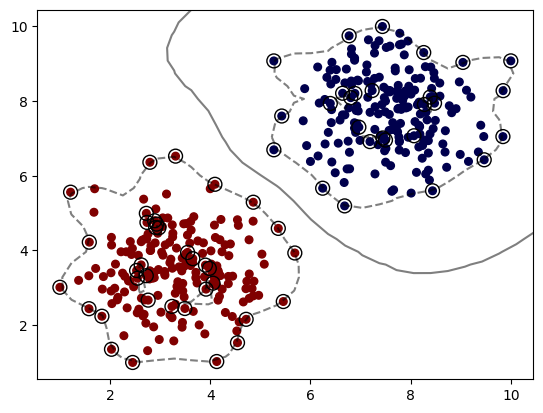

In [36]:
model = SVC(kernel = 'rbf' , gamma = 0.7 ,C = 1) # by default gamma = 'sccale'
# As we increase the value of gamma then our model will moves towards overfittiing
model.fit(X,y)
plot_svm_boundary(model , X ,y)

### kernal = 'sigmoid'

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


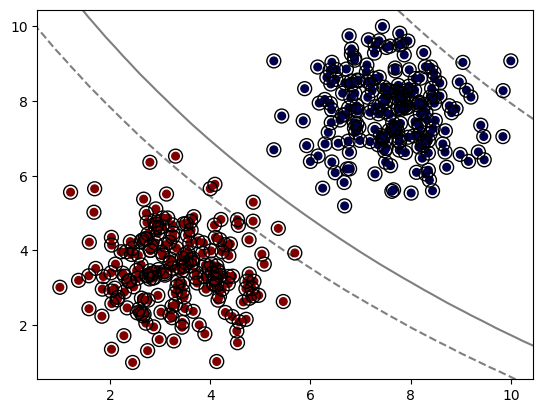

In [37]:
model = SVC(kernel = 'sigmoid',C = 1)
model.fit(X,y)
plot_svm_boundary(model , X ,y)

HERE we can see that almost all the points are marked as support points , which is not good

## kernel = 'polynomial'

C:\Users\markp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


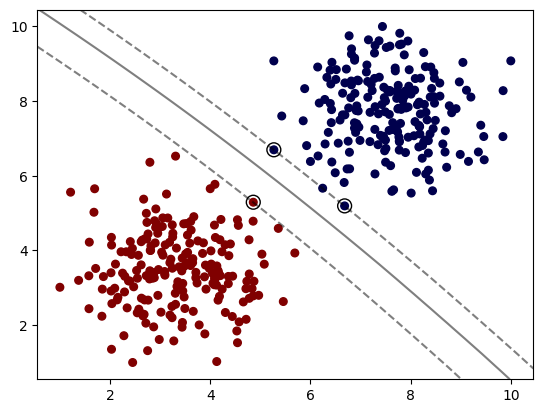

In [40]:
model = SVC(kernel = 'poly',degree = 5 ,C = 1)
model.fit(X,y)
plot_svm_boundary(model , X ,y)

## For getting best combination of 'kernel' and 'C' value we will do Cross Validation

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
svm = SVC()

In [43]:
param = {'C':[0.01,0.1,1,10,100 , 1000],
          'kernel':['rbf' , 'linear']}

In [44]:
grid = GridSearchCV(svm , param_grid=param)

In [45]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']})

In [52]:
grid.best_estimator_

SVC(C=0.01)